<a href="https://colab.research.google.com/github/headnotf0und/refactored-octo-rotary-phone/blob/main/Chromebooki_rev_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install pymcdm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.1/106.1 kB 1.5 MB/s eta 0:00:00


In [7]:
import pymcdm as pm
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from math import pi

In [3]:
# Dane o Chromebookach w formie listy list bez kolumny z nazwą modelu
# Kolejność kolumn: Cena, Przekątna ekranu, Full HD, IPS, RAM, Pojemność pamięci, Qwerty PL, Moc procesora, EOL,
chromebooks = np.array([
    [325, 11, 0, 1, 4, 32, 0, 2436, 2],  # Acer Spin 511
    [259, 11, 0, 1, 4, 32, 0, 1178, 0],  # Acer R11
    [339, 11, 0, 0, 4, 32, 0, 1423, 0],  # ASUS Chromebook C214M
    [300, 14, 1, 0, 8, 64, 0, 2867, 5],  # ASUS CHROMEBOOK C433T
    [309, 14, 1, 0, 8, 64, 0, 1107, 3]   # Asus Chromebook C523N
])

# Nazwy Chromebooków
chromebook_names = ["Acer Spin 511", "Acer R11", "ASUS Chromebook C214M", "ASUS CHROMEBOOK C433T", "Asus Chromebook C523N"]

In [4]:
# Wyświetlenie danych z opisem kolumn
for name, chromebook in zip(chromebook_names, chromebooks):
    print(f"{name}: Cena = {chromebook[0]}, Przekątna ekranu = {chromebook[1]} cali, FHD = {chromebook[2]}, IPS = {chromebook[3]}, RAM = {chromebook[4]} GB, Pojemność pamięci = {chromebook[5]} GB, Klawiatura Qwerty PL = {chromebook[6]}, Moc procesora = {chromebook[7]} MHz, EOL = {chromebook[8]} lata")

# Zdefiniuj wagi dla każdego kryterium
weights = np.array([0.2, 0.05, 0.1, 0.1, 0.1, 0.1, 0.1, 0.2, 0.05])

# Zdefiniuj zysk / strata dla każdego kryterium
types = np.array([-1, -1, 1, 1, 1, 1, 1, 1, 1])   # 1 jako zysk (max), -1 jako koszt (min)






Acer Spin 511: Cena = 325, Przekątna ekranu = 11 cali, FHD = 0, IPS = 1, RAM = 4 GB, Pojemność pamięci = 32 GB, Klawiatura Qwerty PL = 0, Moc procesora = 2436 MHz, EOL = 2 lata
Acer R11: Cena = 259, Przekątna ekranu = 11 cali, FHD = 0, IPS = 1, RAM = 4 GB, Pojemność pamięci = 32 GB, Klawiatura Qwerty PL = 0, Moc procesora = 1178 MHz, EOL = 0 lata
ASUS Chromebook C214M: Cena = 339, Przekątna ekranu = 11 cali, FHD = 0, IPS = 0, RAM = 4 GB, Pojemność pamięci = 32 GB, Klawiatura Qwerty PL = 0, Moc procesora = 1423 MHz, EOL = 0 lata
ASUS CHROMEBOOK C433T: Cena = 300, Przekątna ekranu = 14 cali, FHD = 1, IPS = 0, RAM = 8 GB, Pojemność pamięci = 64 GB, Klawiatura Qwerty PL = 0, Moc procesora = 2867 MHz, EOL = 5 lata
Asus Chromebook C523N: Cena = 309, Przekątna ekranu = 14 cali, FHD = 1, IPS = 0, RAM = 8 GB, Pojemność pamięci = 64 GB, Klawiatura Qwerty PL = 0, Moc procesora = 1107 MHz, EOL = 3 lata


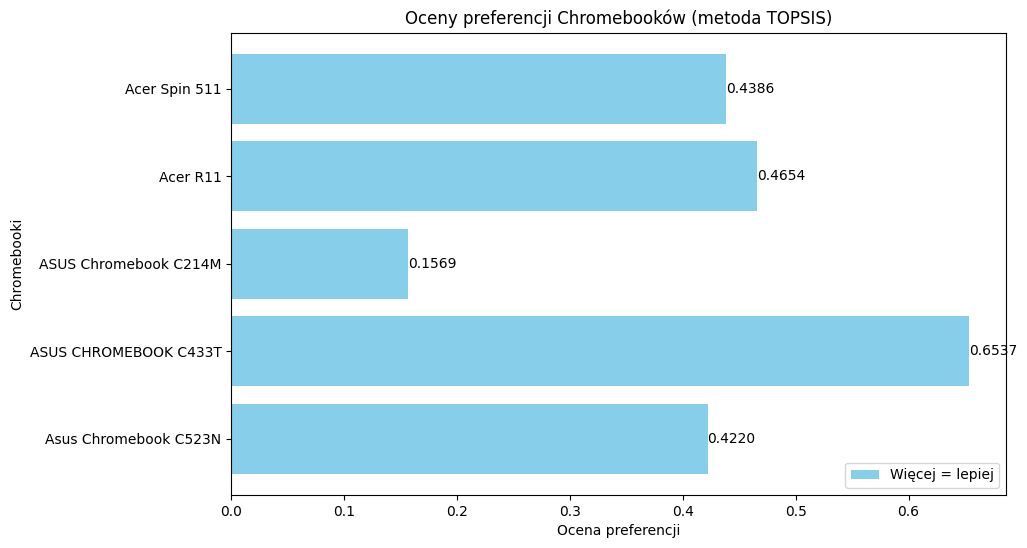


Rankingi:
ASUS CHROMEBOOK C433T: Miejsce 1.0
Acer R11: Miejsce 2.0
Acer Spin 511: Miejsce 3.0
Asus Chromebook C523N: Miejsce 4.0
ASUS Chromebook C214M: Miejsce 5.0


In [5]:
# Inicjalizuj metodę TOPSIS
topsis = pm.methods.TOPSIS()

# Zastosuj metodę TOPSIS
pref = topsis(chromebooks, weights, types)

# Oceń alternatywy
rank = topsis.rank(pref)

# Wykres słupkowy z ocenami preferencji
plt.figure(figsize=(10, 6))
bars = plt.barh(chromebook_names, pref, color='skyblue')

# Dodaj opisy słupków
for bar in bars:
    plt.text(bar.get_width(), bar.get_y() + bar.get_height()/2, f'{bar.get_width():.4f}', va='center', ha='left', color='black')

plt.xlabel('Ocena preferencji')
plt.ylabel('Chromebooki')
plt.title('Oceny preferencji Chromebooków (metoda TOPSIS)')
plt.gca().invert_yaxis()  # Odwróć kolejność na osi y, aby najlepszy wynik był na górze

# Dodaj legendę
plt.legend(['Więcej = lepiej'], loc='lower right')

plt.show()
# W przypadku metody TOPSIS najbardziej znacząca wartość preferencji (bliższa do 1) oznacza lepszą alternatywę.

# Wyświetl ranking z nazwami Chromebooków
print("\nRankingi:")
ranked_chromebooks = sorted(zip(rank, chromebook_names), key=lambda x: x[0])
for r, name in ranked_chromebooks:
    print(f"{name}: Miejsce {r}")


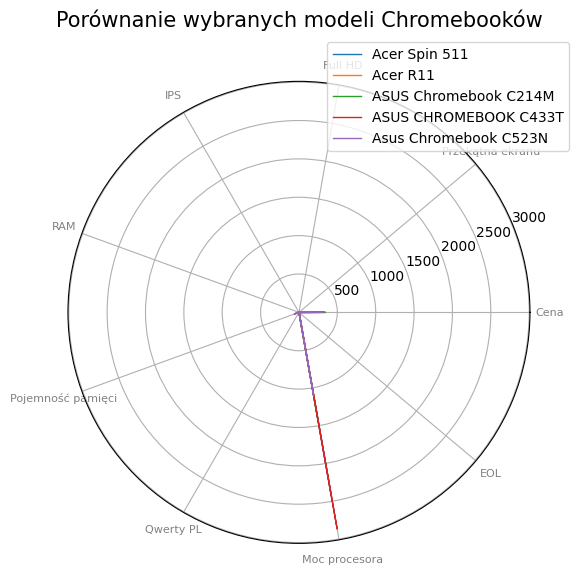

In [8]:
# Dane do wykresu radaru
df = pd.DataFrame(chromebooks, columns=["Cena", "Przekątna ekranu", "Full HD", "IPS", "RAM", "Pojemność pamięci", "Qwerty PL", "Moc procesora", "EOL"])

# Wybierz kilka modeli do porównania
models_to_compare = [0, 1, 2, 3, 4]  # Przykładowe indeksy modeli

# Wykres radaru dla wybranych modeli
fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))
for model_index in models_to_compare:
    values = df.iloc[model_index].values.flatten().tolist()
    values += values[:1]
    angles = [n / float(len(df.columns)) * 2 * pi for n in range(len(df.columns))]
    angles += angles[:1]
    ax.plot(angles, values, linewidth=1, linestyle='solid', label=chromebook_names[model_index])
    ax.fill(angles, values, alpha=0.1)

plt.xticks(angles[:-1], df.columns, color='grey', size=8)
ax.set_title('Porównanie wybranych modeli Chromebooków', size=15, color='black', y=1.1)
ax.legend(loc='upper right', bbox_to_anchor=(1.1, 1.1))
plt.show()


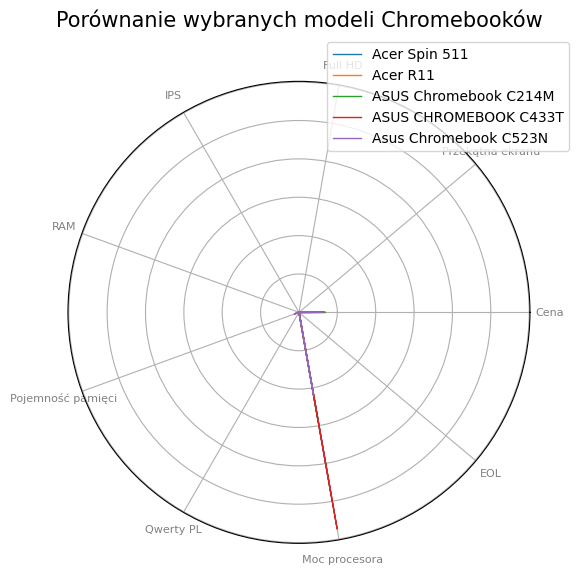

In [9]:


# Dane do wykresu radaru
df = pd.DataFrame(chromebooks, columns=["Cena", "Przekątna ekranu", "Full HD", "IPS", "RAM", "Pojemność pamięci", "Qwerty PL", "Moc procesora", "EOL"])

# Wybierz kilka modeli do porównania
models_to_compare = [0, 1, 2, 3, 4]  # Przykładowe indeksy modeli

# Wykres radaru dla wybranych modeli
fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))

# Dostosowanie zakresu wartości do [0, 1]
for model_index in models_to_compare:
    values = df.iloc[model_index].values.flatten().tolist()
    values += values[:1]
    angles = [n / float(len(df.columns)) * 2 * pi for n in range(len(df.columns))]
    angles += angles[:1]
    ax.plot(angles, values, linewidth=1, linestyle='solid', label=chromebook_names[model_index])
    ax.fill(angles, values, alpha=0.1)

# Konfiguracja osi
plt.xticks(angles[:-1], df.columns, color='grey', size=8)
ax.set_yticklabels([])  # Usunięcie wartości z osi Y dla czytelności
ax.set_title('Porównanie wybranych modeli Chromebooków', size=15, color='black', y=1.1)
ax.legend(loc='upper right', bbox_to_anchor=(1.1, 1.1))
plt.show()
